In [4]:
pip install torch torchvision torchaudio


   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/204.1 MB 1.7 MB/s eta 0:02:04
   ---------------------------------------- 0.2/204.1 MB 2.3 MB/s eta 0:01:29
   ---------------------------------------- 0.5/204.1 MB 3.7 MB/s eta 0:00:55
   ---------------------------------------- 0.8/204.1 MB 4.1 MB/s eta 0:00:51
   ---------------------------------------- 1.1/204.1 MB 4.6 MB/s eta 0:00:44
   ---------------------------------------- 1.4/204.1 MB 5.0 MB/s eta 0:00:41
   ---------------------------------------- 1.5/204.1 MB 5.2 MB/s eta 0:00:40
   ---------------------------------------- 1.5/204.1 MB 5.2 MB/s eta 0:00:40
   ---------------------------------------- 1.7/204.1 MB 4.0 MB/s eta 0:00:51
   ---------------------------------------- 2.0/204.1 MB 4.4 MB/s eta 0:00:46
   ---------------------------------------- 2.3/204.1 MB 4.4 MB/s eta 0:00:46
    --------------------------------------- 2.6/204.1 MB 4.6 MB/s eta 0


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os

In [3]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [4]:
data_dir = 'ShoevsSandalvsBoot'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}

In [8]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_datasets['train'].classes
class_names

{'train': 600, 'val': 528}


['Boot', 'Sandal', 'Shoe']

In [9]:
model = models.resnet18(pretrained=True)


for name, param in model.named_parameters():
    if "fc" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) 


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:

num_epochs = 10
for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("Training complete!")

train Loss: 1.4810 Acc: 0.5217
val Loss: 0.8386 Acc: 0.6496
train Loss: 0.7570 Acc: 0.6867
val Loss: 0.3937 Acc: 0.8504
train Loss: 0.7058 Acc: 0.7333
val Loss: 0.4634 Acc: 0.8144
train Loss: 0.6386 Acc: 0.7350
val Loss: 0.2919 Acc: 0.8788
train Loss: 0.8317 Acc: 0.7017
val Loss: 0.3283 Acc: 0.8788
train Loss: 0.6791 Acc: 0.7483


In [ ]:
torch.save(model.state_dict(), 'footware_classification_model.pth')

In [8]:
import torch
from torchvision import models, transforms
from PIL import Image


model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1000) 
model.load_state_dict(torch.load('footware_classification_model.pth'))
model.eval()

new_model = models.resnet18(pretrained=True)
new_model.fc = nn.Linear(new_model.fc.in_features, 3)  

new_model.fc.weight.data = model.fc.weight.data.clone()
new_model.fc.bias.data = model.fc.bias.data.clone()


In [7]:

image_path = r"C:\Users\itshr\PTS2_MP1\ShoevsSandalvsBoot\train\Sandal\Sandal (145).jpg"
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  

NameError: name 'Image' is not defined

In [10]:

with torch.no_grad():
    output = model(input_batch)


_, predicted_class = output.max(1)


class_names = ['Boot', 'Sandal','Shoe'] 
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')

The predicted class is: Shoe


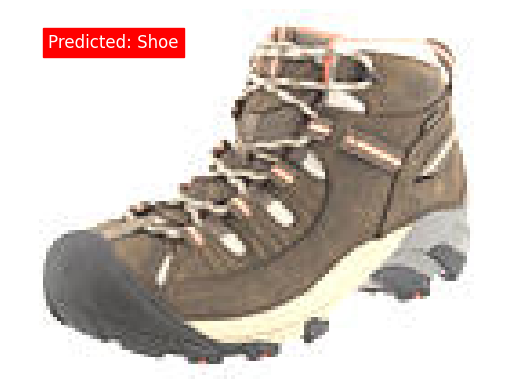

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()